<a href="https://colab.research.google.com/github/pushkarsri999/eda_project_on_airbnb_hotel_booking_analysis/blob/main/My_project_on_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(25,8)

In [ ]:
file_path="/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv"
data=pd.read_csv(file_path)


In [ ]:
# sample of our data is
data.head()

i am starting our E.D.A. here i am analysing the variables, and analysing that there is any need of data cleaning


In [ ]:
# checking of our data
data.info()

Here four((name,host_name,last_reviews,reviews_per_month) out of sixteen variable are ambiguous so i am droping these variable 
reviews_per_month column has nan values which must be replaced by zeros in order to make our data meaningful

In [ ]:
data.drop(['name','host_name','last_review'],axis=1,inplace=True)

In [ ]:
# removing nan values from coloum review_per_month
data.fillna({'reviews_per_month':0},inplace=True)

now our data in little bit clean now i am starting our observation

In [ ]:
#exploring cleaned data 
relevent=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
data[relevent].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Here minimum value of price is zero so i can exclude this obsevation 

In [ ]:
# excluding rows with price as Zero
data=data.loc[data['price']>0]
data[relevent].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


now we see the  mathup among variable.

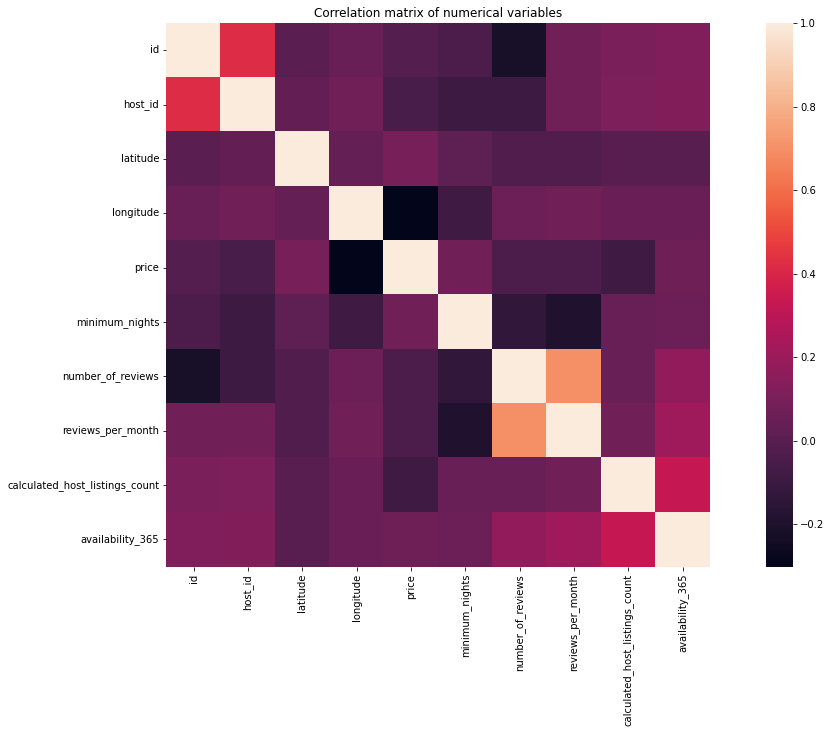

In [ ]:
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(data.corr(method='kendall'), square=True)
plt.title(title)
plt.ioff()

here only number_of_reviews and reviews_per_month are strongly correlated.

now look  the variable neighbourhood_group

In [ ]:
variable=data.groupby('neighbourhood_group')['id'].count().reset_index()
variable

,neighbourhood_group,id
0,Bronx,1090
1,Brooklyn,20095
2,Manhattan,21660
3,Queens,5666
4,Staten Island,373


In [ ]:
#now Seaborn color palette 
colors = sns.color_palette('bright')[0:5]

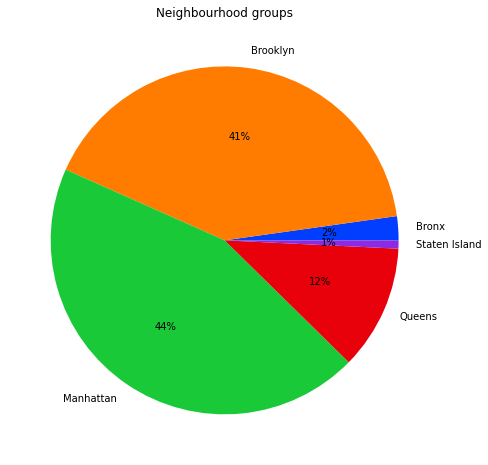

In [ ]:
#now pie chart
plt.pie(variable['id'],labels=variable['neighbourhood_group'], colors = colors, autopct='%.0f%%')
plt.title("Neighbourhood groups")
plt.show()

The scatter plot

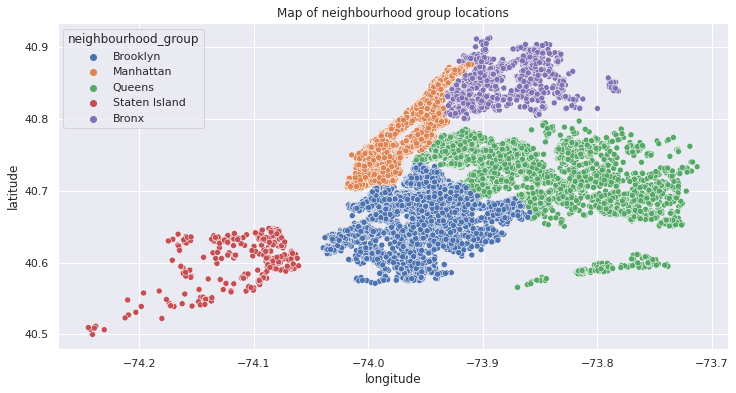

In [ ]:
title='Map of neighbourhood group locations'
sns.set(rc={"figure.figsize":(12, 6)})
sns.scatterplot(x=data['longitude'],y=data['latitude'],hue=data['neighbourhood_group']).set_title(title)
plt.ioff()